Accuracy Scores:
Decision Tree (No Pruning): 0.9474
Decision Tree (Pruned):      0.9474
Random Forest:               0.9649

Decision Tree (No Pruning):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Decision Tree (Pruned):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.9

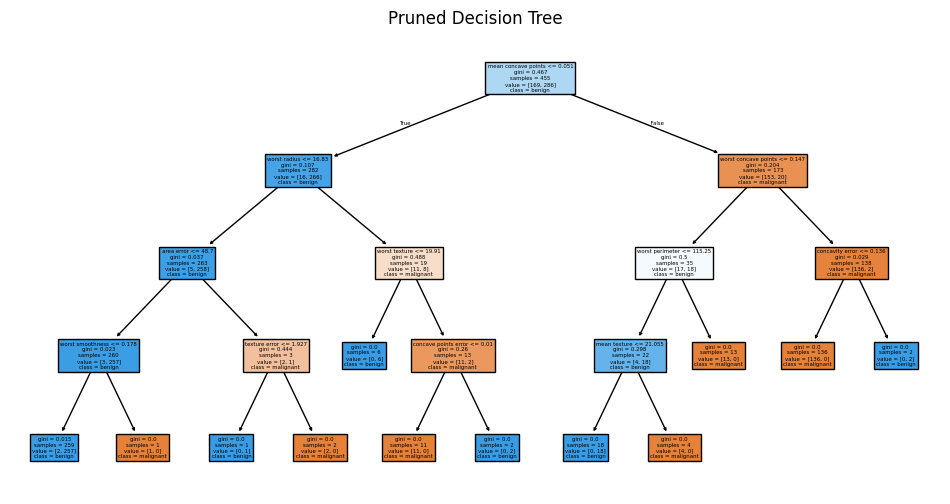

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy Scores:")
print(f"Decision Tree (No Pruning): {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree (Pruned):      {accuracy_score(y_test, y_pred_pruned):.4f}")
print(f"Random Forest:               {accuracy_score(y_test, y_pred_rf):.4f}\n")

print("Decision Tree (No Pruning):\n", classification_report(y_test, y_pred_dt))
print("Decision Tree (Pruned):\n", classification_report(y_test, y_pred_pruned))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dt_pruned, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Pruned Decision Tree")
plt.show()
